## Correlation and Autocorrelation

Source DataCamp.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)
import statsmodels.api as sm

### Introduction to Course
  - #### Part 1

In [3]:
diet = pd.read_csv('./dataset/diet.csv', index_col=0)
diet.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


Time series analysis deals with data that is ordered in time. Many of the most interesting applications of time series analysis are financial time series. In this course, you will look at a variety of financial time series: stocks, bonds, commodities, even crytpocurrencies like Bitcoin.

In this course, you will learn about various time series models, fit the data to these models, and use these models to make forecasts of the future. You will also learn how to use various statistical packages in Python to perform these tasks. Numerous examples will be provided, and I hope that these examples not only demonstrate how to apply these tools, but also address some interesting puzzles, mainly in the field of finance.

###  1: A  A "Thin" Application of Time Series
Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

In [4]:
#Convert the date index to datetime using pandas's to_datetime().
diet.index = pd.to_datetime(diet.index)

In [5]:
diet.index

DatetimeIndex(['2011-06-26', '2011-07-03', '2011-07-10', '2011-07-17',
               '2011-07-24', '2011-07-31', '2011-08-07', '2011-08-14',
               '2011-08-21', '2011-08-28',
               ...
               '2016-04-17', '2016-04-24', '2016-05-01', '2016-05-08',
               '2016-05-15', '2016-05-22', '2016-05-29', '2016-06-05',
               '2016-06-12', '2016-06-19'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

<AxesSubplot:xlabel='Date'>

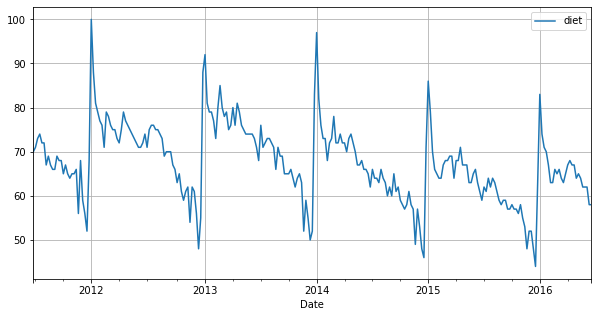

In [6]:
#Plot the time series and set the argument grid to True to better see the year-ends.
diet.plot(grid=True)

<AxesSubplot:xlabel='Date'>

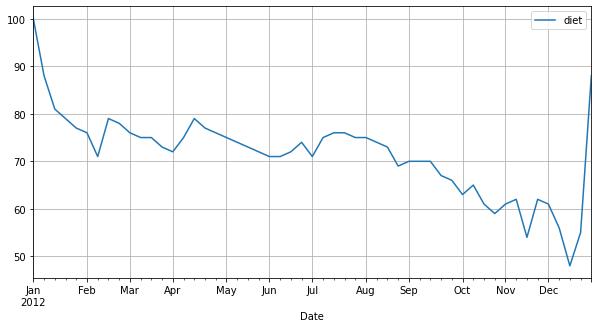

In [7]:
#Slice the diet dataset to keep only values from 2012, assigning to diet2012.
#Plot the diet2012, again creating gridlines with the grid argument.
diet2012 = diet["2012"]
diet2012.plot(grid=True)

### 1: B  Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from FRED, are pre-loaded in DataFrames stocks and bonds.

 - Convert the dates in the stocks.index and bonds.index into sets.

 - Take the difference of the stock set minus the bond set to get those dates where the stock market has data but the bond market does not.

 - Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, which has the syntax df1.join(df2).

 - To get the intersection of dates, use the argument how='inner'.


In [8]:
#Slice the diet dataset to keep only values from 2012, assigning to diet2012.
#Plot the diet2012, again creating gridlines with the grid argument.

stocks = pd.read_csv('./dataset/stocks.csv', index_col=0)
bonds = pd.read_csv('./dataset/bonds.csv', index_col=0)


In [9]:
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

In [10]:
set_stock_dates - set_bond_dates

{'2007-10-08',
 '2007-11-12',
 '2008-10-13',
 '2008-11-11',
 '2009-10-12',
 '2009-11-11',
 '2010-10-11',
 '2010-11-11',
 '2011-10-10',
 '2011-11-11',
 '2012-10-08',
 '2012-11-12',
 '2013-10-14',
 '2013-11-11',
 '2014-10-13',
 '2014-11-11',
 '2015-10-12',
 '2015-11-11',
 '2016-10-10',
 '2016-11-11',
 '2017-06-09'}

In [11]:
stocks_and_bonds = stocks.join(bonds, how="inner")

In [12]:
stocks_and_bonds

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16
...,...,...
2017-06-02,2439.07,2.15
2017-06-05,2436.10,2.18
2017-06-06,2429.33,2.14


### 2 : Correlation of Two Time Series

 - Correlation of Two Time Series
 
      Often, two time series vary together. 
      The correlation coefficient is a measure of how much two series vary together. A correlation of one means that the two series have a perfect linear relationship with no deviations. High correlations mean that the two series strongly vary together. A low correlation means they vary together, but there is a weak association. And a high negative correlation means they vary in opposite directions, but still with a linear relationship.
      
      -  Common Mistake: Correlation of Two Trending Series
      
Consider two time series that are both trending. Even if the two series are totally unrelated, you could still get a very high correlation. That's why, when you look at the correlation of say, two stocks, you should look at the correlation of their *returns*, not their levels. In this example, the two series, stock prices and UFO sightings, both trend up over time. Of course, there is no relationship between those two series, but the correlation is 0.94. If you compute the correlation of percent changes, the correlation goes down to approximately zero.

 - Example: Correlation of Large Cap and Small Cap Stocks:

Now you'll see how to compute the correlation of two financial time series, the S&P500 index of large cap stocks and the Russell 2000 index of small cap stocks, using the pandas correlation method. First compute the percent changes using the pct_change method. This gives the returns of these series instead of prices.

#### 2:A Correlation of Stocks and Bonds

Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y

 - Compute percent changes on the stocks_and_bonds DataFrame using the .pct_change() method and call the new DataFrame returns.
 - Compute the correlation of the columns SP500 and US10Y in the returns DataFrame using the .corr() method for Series which has the syntax series1.corr(series2).
 - Show a scatter plot of the percentage change in stock and bond yields.

In [13]:
returns = stocks_and_bonds.pct_change()

In [14]:
correlation = returns["SP500"].corr(returns["US10Y"])
print("correlation of stocks and interest rates are  : ", correlation)

correlation of stocks and interest rates are  :  0.4119448886249271


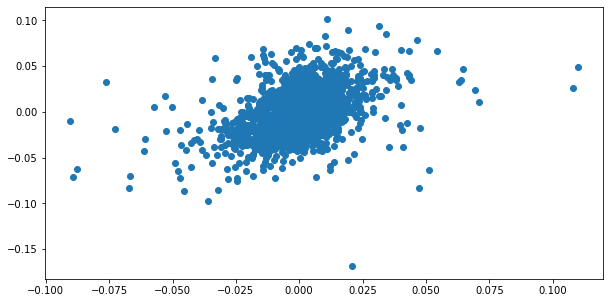

In [15]:
plt.scatter(returns["SP500"], returns["US10Y"])
plt.show()

#### 2 B: Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

The DataFrame levels contains the levels of DJI and UFO. UFO data was downloaded from www.nuforc.org.

 - Calculate the correlation of the columns DJI and UFO.
 - Create a new DataFrame of changes using the .pct_change() method.
 - Re-calculate the correlation of the columns DJI and UFO on the changes.

In [16]:
DJI = pd.read_csv('./dataset/DJI.csv', index_col=0)
DJI.columns = ['DJI']
DJI.head()

,DJI
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [47]:
UFO = pd.read_csv('./dataset/UFO.csv', index_col=0)
UFO.columns = ['UFO']
UFO.head()

,UFO
Date,
1941,1
1942,2
1943,9
1944,9
1945,9


In [54]:
UFO.index = pd.to_datetime(UFO.index, format="%Y")
DJI.index = pd.to_datetime(DJI.index, format="%Y")

In [57]:
levels = DJI.join(UFO, how="inner")
levels.head()

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9


Text(0, 0.5, 'Dow Jones Average')

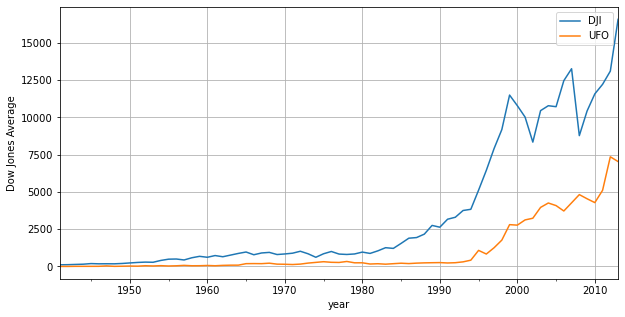

In [62]:
levels.plot(grid=True)
plt.xlabel("year")
plt.ylabel("Dow Jones Average")

In [74]:
#Calculate the correlation of the columns DJI and UFO
correlation1 = levels["DJI"].corr(levels["UFO"])
print("correlation of Dow Jones, UFO and interest rates are  : ", correlation1)

correlation of Dow Jones, UFO and interest rates are  :  0.9399762210726432


In [75]:
#Create a new DataFrame of changes using the .pct_change() method.
changes = levels.pct_change()
changes.head()

,DJI,UFO
Date,,
1941-01-01,NaN,NaN
1942-01-01,0.076063,1.0
1943-01-01,0.138107,3.5
1944-01-01,0.120907,0.0
1945-01-01,0.266478,0.0


In [79]:
#Re-calculate the correlation of the columns DJI and UFO on the changes
correlation1_change = changes["DJI"].corr(changes["UFO"])
print("correlation of levels  : ", correlation1)
print("correlation of changes ", correlation1_change)

correlation of levels  :  0.9399762210726432
correlation of changes  0.06026935462405376


### 3:Simple Linear Regression of time series
 -   What is a Regression?
    - A linear regression is also known as Ordinary Least Squares, or OLS, because it minimizes the sum of the squared distances between the data points and the regression line.


 - Relationship Between R-Squared and Correlation
 
From the scatter diagrams, you saw that the correlation measures how closely the data are clustered along a line. The R-squared also measures how well the linear regression line fits the data. So as you would expect, there is a relationship between correlation and R-squared. The magnitude of the correlation is the square root of the R-squared. And the sign of the correlation is the sign of the slope of the regression line. If the regression line is positively sloped, the correlation is positive and if the the regression line is negatively sloped, the correlation is negative. 

 - Regression of Small Cap Returns on Large Cap
 
Now you'll regress the returns of the small cap stocks on the returns of large cap stocks. Compute returns from prices using the "pct_change" method in pandas. You need to add a column of ones as a dependent, right hand side variable. The reason you have to do this is because the regression function assumes that if there is no constant column, then you want to run the regression without an intercept. By adding a column of ones, statsmodels will compute the regression coefficient of that column as well, which can be interpreted as the intercept of the line. The statsmodels method "add constant" is a simple way to add a constant.
 
 

![](img1.png)

#### Relationship Between R-Squared and Correlation

![](img2.png)

#### 3 A: Looking at a Regression's R-Squared
    
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the $\alpha$ in the regression $y_t = \alpha + \beta x_t + \epsilon_t$). To include a constant using the function ```OLS()```,  you need to add a column of 1's to the right hand side of the regression.

The module statsmodels.api has been imported for you as sm.

 - Compute the correlation between x and y using the .corr() method.
 - Run a regression:
 - First convert the Series x to a DataFrame dfx.
 - Add a constant using sm.add_constant(), assigning it to dfx1
 - Regress y on dfx1 using sm.OLS().fit().
 - Print out the results of the regression and compare the R-squared with the correlation.

In [95]:
df_x = pd.read_csv('./dataset/x.csv', index_col=0, header=None)
df_y = pd.read_csv('./dataset/y.csv', index_col=0, header=None)

df_x.columns = ['x']
df_y.columns = ['y']

x = df_x.reset_index(drop=True)['x']
y = df_y.reset_index(drop=True)['y']

In [97]:

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" % (correlation))
# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())


The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:04:42   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

Note:  The correlation between x and y is -0.90 and the  R-squared: 0.818

In [104]:
#Intercept in result: see in above result "constant" in coef
result.params[0]

-0.005248433742524225

In [103]:
# slope in result: see in above result "x" in coef
result.params[1]

-0.907994546789463

### 4:  Autocorrelation

So far, you have looked at the correlation of two time series. Autocorrelation is the correlation of a single time series with a lagged copy of itself. It's also called "serial correlation". Often, when we refer to a series's autocorrelation, we mean the "lag-one" autocorrelation. So when using daily data, for example, the autocorrelation would be the correlation of the series with the same series lagged by one day.

 - What does it mean when a series has a positive or negative autocorrelation? With financial time series, when returns have a negative autocorrelation, we say it is "mean reverting".

 - Alternatively, if a series has positive autocorrelation, we say it is "trend-following".
 
  - Traders Use Autocorrelation to Make Money
 
Let you think these concepts of autocorrelation are purely theoretical, they are actually used on Wall Street to make money. Many hedge fund strategies are only slightly more complex versions of mean reversion and momentum strategies. Since stocks have historically had negative autocorrelation over horizons of about a week, one popular strategy is to buy stocks that have dropped over the last week and sell stocks that have gone up. 

For other assets like commodities and currencies, they have historically had positive autocorrelation over horizons of several months, so the typical hedge fund strategy there is to buy commodities that have gone up in the last several months and sell those commodities that have gone down.

![](img3.png)

![](img4.png)
![](img5.png)
![](img6.png)

#### 4 A:  A Popular Strategy Using Autocorrelation

One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

This simple idea is actually the basis for a popular hedge fund strategy. If you're curious to learn more about this hedge fund strategy (although it's not necessary reading for anything else later in the course), see here.

You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so you will have to select the column in the DataFrame.

 - Use the .resample() method with rule='W' and how='last'to convert daily data to weekly data.
 - The argument how in .resample() has been deprecated.
 - The new syntax .resample().last() also works.
 - Create a new DataFrame, returns, of percent changes in weekly prices using the .pct_change() method.
 - Compute the autocorrelation using the .autocorr() method on the series of closing stock prices, which is the column 'Adj Close' in the DataFrame returns.

In [108]:
MSFT = pd.read_csv('./dataset/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [114]:
# Use the .resample() method with rule='W' and how='last'to convert daily data to weekly data.
# The argument how in .resample() has been deprecated.
# The new syntax .resample().last() also works. eg:  MSFT.resample(rule="W").last()
MSFT = MSFT.resample(rule="W").last()

# Create a new DataFrame, returns, of percent changes in weekly prices using the .pct_change() method.
returns = MSFT.pct_change()

# Compute the autocorrelation using the .autocorr() method on the series of closing stock prices,
# which is the column 'Adj Close' in the DataFrame returns.
autocorrelation = returns["Adj Close"].autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

The auto correlation of weekly returns is -0.16


Note: Notice how the autocorrelation of returns for MSFT is negative, so the stock is 'mean reverting'

#### 4.B:  Are Interest Rates Autocorrelated?

When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

 - Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.
 - Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.
 - Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.
 - The argument how in .resample() has been deprecated.
 - The new syntax .resample().last() also works.
 - Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

In [116]:
daily_rates = pd.read_csv('./dataset/daily_rates.csv', index_col=0, parse_dates=['DATE'])
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [120]:
# Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.
daily_diff = daily_rates.diff()
                                  
# Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.
autocorrelation_daily = daily_diff["US10Y"].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))
                                  
# Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.
yearly_rates = daily_rates.resample(rule='A').last()

# Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.
                                  
yearly_diff = yearly_rates.diff()   
autocorrelation_yearly =  yearly_diff["US10Y"].autocorr()
print("The autocorrelation of yearly interest rate changes is %4.2f" %(autocorrelation_yearly))


The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of yearly interest rate changes is -0.22


Note : Notice how the daily autocorrelation is small but the annual autocorrelation is large and negative
                                  